# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [62]:
X_test = pd.read_csv(r"C:\Users\Matheus\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\output\X_test.csv")
X_train = pd.read_csv(r"C:\Users\Matheus\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\output\X_train.csv")
y_test = pd.read_csv(r"C:\Users\Matheus\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt", header=None)
y_train = pd.read_csv(r"C:\Users\Matheus\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt", header=None)




### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [147]:
X_test, X_validation, y_test, y_validation = train_test_split(X_train, y_train, test_size=0.25)



# Here, we took 0.25 from the training set to use as a validation set, which means that we will evaluate the precision of our model 
# on the test set and later test the same precision on the validation set, which has not been used to create the models, or to choose
# the best one from all the models created...

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [71]:
clf0 = DecisionTreeClassifier(random_state=40028922)

path = clf0.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
#DecisionTreeClassifier(max_depth=4, random_state=40028922, min_samples_leaf=15)

clf0s = []

for ccp_alpha in ccp_alphas[::5]:
    clf0 = DecisionTreeClassifier(random_state=40028922, max_depth=4, min_samples_leaf=15).fit(X_train, y_train)
    clf0s.append(clf0)


In [133]:
importances = clf0s[0].feature_importances_
index_best_imp = np.argsort(importances)[-3:][::-1]
best_vars = [X_train.columns[best_imp] for best_imp in index_best_imp]
best_vars

['tGravityAcc-min()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [143]:
%%time
X_train3 = X_train[best_vars]

clf0 = DecisionTreeClassifier(random_state=40028922)
clf0s = []
path = clf0.cost_complexity_pruning_path(X_train3, y_train)
ccp_alphas3, impurities3 = path.ccp_alphas, path.impurities


for ccp_alpha in ccp_alphas3:
    clf0 = DecisionTreeClassifier(random_state=40028922, min_samples_leaf=15, ccp_alpha=ccp_alpha).fit(X_train3, y_train)
    clf0s.append(clf0)



CPU times: total: 10.7 s
Wall time: 12.2 s


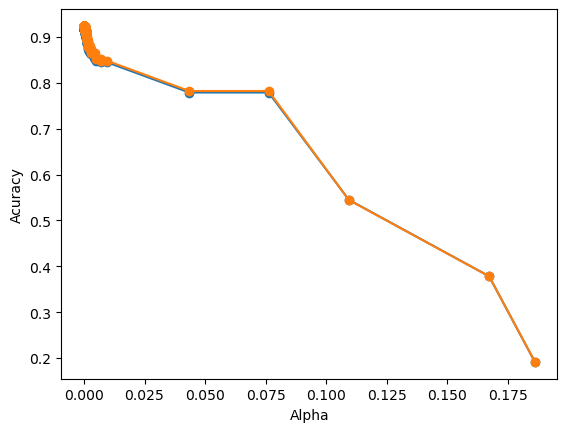

In [149]:
validation_scores = [clf0.score(X_validation, y_validation) for clf0 in clf0s]
train_scores = [clf0.score(X_train, y_train) for clf0 in clf0s]


fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Acuracy')
ax.plot(ccp_alphas3, train_scores, marker='o', label = 'treino')
ax.plot(ccp_alphas3, validation_scores, marker='o', label = 'teste')

# As we can see, the training and test scores are nearly equal most of the time. So, it is unlikely 
# that our overfitting is high. To find the best CCPAlpha parameter, we can extract it by doing:

In [157]:
ind_best_tree = len(validation_scores) - validation_scores[::-1].index(max(validation_scores))-1
best_tree = clf0s[ind_best_tree]

best_ccp_alpha = best_tree.ccp_alpha
best_ccp_alpha

0.0002221617700398984

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [159]:
best_tree.score(X_test, y_test)

0.9147624229234675